In [1]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
image_generator = ImageDataGenerator(rescale=1/255,zoom_range=0.2, validation_split=0.3)    

train = image_generator.flow_from_directory(directory=os.path.join(os.getcwd(),'C:/Users/HP/Pictures/data'),
                          target_size=(224,224),
                          classes=['0','1','2','3','4'],
                          subset="training",                              
                          batch_size=5
                          )

In [ ]:
validation = image_generator.flow_from_directory(directory=os.path.join(os.getcwd(),'C:/Users/HP/Pictures/data'),
                                                 batch_size=5,
                                                 classes=['0','1','2','3','4'],
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 )

C:\Users\HP\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


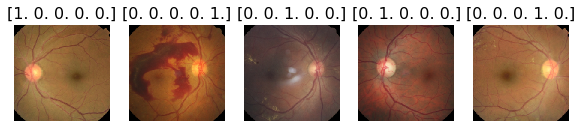

In [32]:
def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i + 1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],interpolation=None if interp else 'none')

imgs, labels = next(train)
plots(imgs, titles=labels)

In [8]:
from keras.applications.vgg16 import VGG16

vgg16 = VGG16()

model = Sequential()

In [9]:
for layer in vgg16.layers[:-1]:
    model.add(layer)

#Freezing all layers except last layer for transfer learning
for layer in model.layers:
    layer.trainable = False

In [10]:
model.add(Dense(5,activation='softmax'))


In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit_generator(train,epochs=5,steps_per_epoch=17,validation_data = validation, 
verbose=1)


C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
17/17 [==============================] - 215s 13s/step - loss: 2.4563 - accuracy: 0.1776 - val_loss: 2.3998 - val_accuracy: 0.2527
Epoch 2/5
17/17 [==============================] - 192s 12s/step - loss: 2.1044 - accuracy: 0.2249 - val_loss: 1.6500 - val_accuracy: 0.2509
Epoch 3/5
17/17 [==============================] - 216s 13s/step - loss: 1.8838 - accuracy: 0.3700 - val_loss: 1.8335 - val_accuracy: 0.2509
Epoch 4/5
17/17 [==============================] - 201s 12s/step - loss: 2.1589 - accuracy: 0.1753 - val_loss: 1.6577 - val_accuracy: 0.2527
Epoch 5/5
17/17 [==============================] - 165s 10s/step - loss: 1.8079 - accuracy: 0.1795 - val_loss: 1.6266 - val_accuracy: 0.2600


In [13]:
score = model.evaluate_generator(train,steps=17)
print(score)

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[1.6316720247268677, 0.25882354378700256]


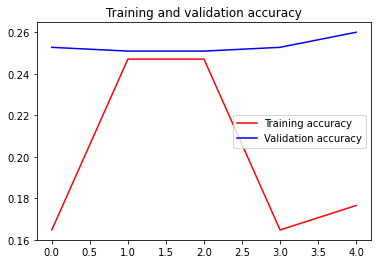

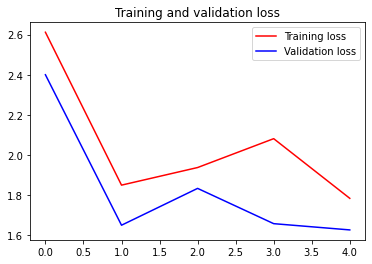

In [14]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
score = model.evaluate(validation)


110/110 [==============================] - 134s 1s/step - loss: 1.6331 - accuracy: 0.2564


In [16]:

batch_size = 10
test_score = model.evaluate_generator(validation, batch_size)



print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

[INFO] accuracy: 26.00%
[INFO] Loss:  1.5819265842437744


In [18]:
from sklearn.metrics import confusion_matrix
matrice =confusion_matrix(train,validation)


In [ ]:
import seaborn as sns
sns.heatmap(matrice, annot=True)

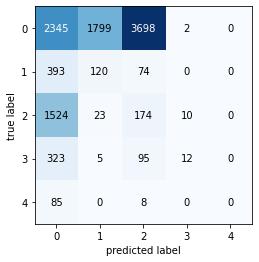

In [27]:
import seaborn as sns
sns.heatmap(matrice, annot=True)

In [29]:
num_classes=5
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(train, validation, target_names=target_names))


   precision  recall  f1-score
0      0.300   0.500     0.370
1      0.200   0.062     0.095
2      0.100   0.043     0.060
3      0.028   0.500     0.052
4      0.000   0.000     0.000
